In [1]:
import yfinance as yf

crudeoil_data = yf.download("CL=F", start="2001-01-01", end="2023-03-30")
print("Crude Oil dataset\n ", crudeoil_data)

[*********************100%***********************]  1 of 1 completed
Crude Oil dataset
                   Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2001-01-02  27.250000  27.400000  26.600000  27.200001  27.200001   52321
2001-01-03  27.230000  28.139999  27.049999  27.950001  27.950001   66628
2001-01-04  28.200001  28.780001  27.850000  28.200001  28.200001   74383
2001-01-05  28.150000  28.799999  27.799999  28.000000  28.000000   63852
2001-01-08  28.200001  28.400000  27.150000  27.350000  27.350000   76058
...               ...        ...        ...        ...        ...     ...
2023-03-23  69.949997  71.669998  69.139999  69.959999  69.959999  335241
2023-03-24  69.510002  70.379997  66.820000  69.260002  69.260002  380852
2023-03-27  69.419998  73.099998  69.129997  72.809998  72.809998  353598
2023-03-28  72.860001  73.930000  72.190002  73.199997  73.199997  328472
2023-03-29  73.610001  

In [2]:
import pandas as pd

crudeoil_df = pd.DataFrame(crudeoil_data)
print("CrudeOil\n",crudeoil_df)

CrudeOil
                  Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2001-01-02  27.250000  27.400000  26.600000  27.200001  27.200001   52321
2001-01-03  27.230000  28.139999  27.049999  27.950001  27.950001   66628
2001-01-04  28.200001  28.780001  27.850000  28.200001  28.200001   74383
2001-01-05  28.150000  28.799999  27.799999  28.000000  28.000000   63852
2001-01-08  28.200001  28.400000  27.150000  27.350000  27.350000   76058
...               ...        ...        ...        ...        ...     ...
2023-03-23  69.949997  71.669998  69.139999  69.959999  69.959999  335241
2023-03-24  69.510002  70.379997  66.820000  69.260002  69.260002  380852
2023-03-27  69.419998  73.099998  69.129997  72.809998  72.809998  353598
2023-03-28  72.860001  73.930000  72.190002  73.199997  73.199997  328472
2023-03-29  73.610001  74.370003  72.760002  72.970001  72.970001  312669

[5587 rows x 6 columns]


In [3]:
crudeoil_df.to_csv('CrudeoilPrice.csv')
crudeoil_df = pd.read_csv('CrudeoilPrice.csv')


In [4]:
crudeoil_df = crudeoil_df[['Date','Close']]
print("CrudeOil\n",crudeoil_df)

CrudeOil
             Date      Close
0     2001-01-02  27.200001
1     2001-01-03  27.950001
2     2001-01-04  28.200001
3     2001-01-05  28.000000
4     2001-01-08  27.350000
...          ...        ...
5582  2023-03-23  69.959999
5583  2023-03-24  69.260002
5584  2023-03-27  72.809998
5585  2023-03-28  73.199997
5586  2023-03-29  72.970001

[5587 rows x 2 columns]


In [5]:
crudeoil_df['Date']
print("CrudeOil\n",crudeoil_df)

CrudeOil
             Date      Close
0     2001-01-02  27.200001
1     2001-01-03  27.950001
2     2001-01-04  28.200001
3     2001-01-05  28.000000
4     2001-01-08  27.350000
...          ...        ...
5582  2023-03-23  69.959999
5583  2023-03-24  69.260002
5584  2023-03-27  72.809998
5585  2023-03-28  73.199997
5586  2023-03-29  72.970001

[5587 rows x 2 columns]


In [6]:
import datetime

def str_to_datetime(s):
    if isinstance(s, datetime.datetime):
        return s
    else:
        s = str(s)
        split = s.split('-')
        year, month, day = int(split[0]), int(split[1]), int(split[2])
        return datetime.datetime(year=year, month=month, day=day)


datetime_object = str_to_datetime('2001-01-02')
datetime_object

datetime.datetime(2001, 1, 2, 0, 0)

In [7]:
crudeoil_df['Date'] = crudeoil_df['Date'].apply(str_to_datetime)
print("crudeoil_date\n",crudeoil_df['Date'])

crudeoil_date
 0      2001-01-02
1      2001-01-03
2      2001-01-04
3      2001-01-05
4      2001-01-08
          ...    
5582   2023-03-23
5583   2023-03-24
5584   2023-03-27
5585   2023-03-28
5586   2023-03-29
Name: Date, Length: 5587, dtype: datetime64[ns]


In [8]:
crudeoil_df.index = crudeoil_df.pop('Date')
print("CrudeOil\n",crudeoil_df)

CrudeOil
                 Close
Date                 
2001-01-02  27.200001
2001-01-03  27.950001
2001-01-04  28.200001
2001-01-05  28.000000
2001-01-08  27.350000
...               ...
2023-03-23  69.959999
2023-03-24  69.260002
2023-03-27  72.809998
2023-03-28  73.199997
2023-03-29  72.970001

[5587 rows x 1 columns]


In [9]:

print("CrudeOil\n",crudeoil_df.shape)

CrudeOil
 (5587, 1)


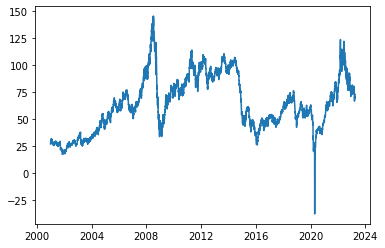

In [10]:
import matplotlib.pyplot as plt
plt.plot(crudeoil_df)

In [11]:
import numpy as np

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
crudeoil_df = scaler.fit_transform(np.array(crudeoil_df).reshape(-1,1))
print("CrudeOil\n",crudeoil_df)

CrudeOil
 [[0.35441725]
 [0.35851741]
 [0.35988412]
 ...
 [0.60376122]
 [0.60589329]
 [0.60463594]]


In [12]:
train_3 = int(len(crudeoil_df)*0.75)
test_3 = len(crudeoil_df) - train_3

train_3data, test_3data = crudeoil_df[0:train_3,:],crudeoil_df[train_3:len(crudeoil_df),:1]

In [13]:
print(len(train_3data), len(test_3data))

4190 1397


In [14]:
def create_dataset3(crudeoil_df, time_step = 1):
    C_dataX,C_dataY  = [], []
    for i in range(len(crudeoil_df)-time_step):
        a = crudeoil_df[i:(i+time_step), 0]
        aa = np.round(a, 5)
        C_dataX.append(aa)
        C_dataY.append(crudeoil_df[i+time_step, 0])
    return np.array(C_dataX, dtype=object), np.array(C_dataY, dtype=object)

In [15]:
time_step = 365

X_train_CrudeOil, Y_train_CrudeOil = create_dataset3(train_3data, time_step)
X_test_CrudeOil, Y_test_CrudeOil = create_dataset3(test_3data, time_step)

In [16]:
print(X_train_CrudeOil.shape)
print(X_test_CrudeOil.shape)

(3825, 365)
(1032, 365)


In [17]:
X_train_CrudeOil = X_train_CrudeOil.reshape(X_train_CrudeOil.shape[0],X_train_CrudeOil.shape[1] , 1)
X_test_CrudeOil = X_test_CrudeOil.reshape(X_test_CrudeOil.shape[0],X_test_CrudeOil.shape[1] , 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(365,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [20]:
X_train_CrudeOil = np.asarray(X_train_CrudeOil).astype(np.float32)
Y_train_CrudeOil = np.asarray(Y_train_CrudeOil).astype(np.float32)
X_test_CrudeOil = np.asarray(X_test_CrudeOil).astype(np.float32)
Y_test_CrudeOil = np.asarray(Y_test_CrudeOil).astype(np.float32)

In [21]:
CrudeOil_model = model.fit(X_train_CrudeOil,Y_train_CrudeOil,validation_data=(X_test_CrudeOil,Y_test_CrudeOil),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
60/60 [==============================] - 75s 994ms/step - loss: 0.0217 - val_loss: 0.0018
Epoch 2/50
60/60 [==============================] - 59s 984ms/step - loss: 7.9158e-04 - val_loss: 9.1097e-04
Epoch 3/50
60/60 [==============================] - 57s 949ms/step - loss: 5.4936e-04 - val_loss: 8.9647e-04
Epoch 4/50
60/60 [==============================] - 57s 944ms/step - loss: 5.2470e-04 - val_loss: 8.5594e-04
Epoch 5/50
60/60 [==============================] - 56s 939ms/step - loss: 4.9906e-04 - val_loss: 7.9465e-04
Epoch 6/50
60/60 [==============================] - 56s 930ms/step - loss: 4.5817e-04 - val_loss: 7.9119e-04
Epoch 7/50
60/60 [==============================] - 65s 1s/step - loss: 4.4758e-04 - val_loss: 9.1051e-04
Epoch 8/50
60/60 [==============================] - 74s 1s/step - loss: 4.1260e-04 - val_loss: 7.9300e-04
Epoch 9/50
60/60 [==============================] - 62s 1s/step - loss: 4.1197e-04 - val_loss: 7.4170e-04
Epoch 10/50
60/60 [=================

In [22]:
import tensorflow as tf

In [23]:
CrudeOiltrain_predict = model.predict(X_train_CrudeOil)
CrudeOiltest_predict = model.predict(X_test_CrudeOil)

33/33 [==============================] - 12s 336ms/step


In [24]:
CrudeOiltrain_predict = scaler.inverse_transform(CrudeOiltrain_predict)
CrudeOiltest_predict = scaler.inverse_transform(CrudeOiltest_predict)

In [25]:
import math
from sklearn.metrics import mean_squared_error

CrudeOil_trainmse = math.sqrt(mean_squared_error(Y_train_CrudeOil,CrudeOiltrain_predict))
print(CrudeOil_trainmse)
CrudeOil_testmse = math.sqrt(mean_squared_error(Y_test_CrudeOil,CrudeOiltest_predict))
print(CrudeOil_testmse)

72.62353430104459
69.51644154105739


In [26]:
crudeoil_df.shape
CrudeOiltrain_predict.shape
CrudeOiltest_predict.shape

(1032, 1)

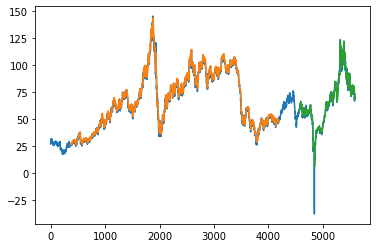

In [27]:
import numpy
time_steps = 365


CrudeOiltrainpredict = numpy.empty_like(crudeoil_df)
CrudeOiltrainpredict[:, :] = np.nan
CrudeOiltrainpredict[time_steps:len(CrudeOiltrain_predict)+time_steps, :] = CrudeOiltrain_predict

CrudeOiltestpredict = numpy.empty_like(crudeoil_df)
CrudeOiltestpredict[:, :] = np.nan
CrudeOiltestpredict[len(CrudeOiltrain_predict)+(time_steps*2):len(crudeoil_df), :] = CrudeOiltest_predict

plt.plot(scaler.inverse_transform(crudeoil_df))
plt.plot(CrudeOiltrainpredict)
plt.plot(CrudeOiltestpredict)
plt.show()

In [28]:
print(len(test_3data))

1397


In [29]:
CrudeOil_input = test_3data[1032:].reshape(1,-1)
CrudeOil_input.shape

(1, 365)

In [30]:
CrudeOiltemp_input = list(CrudeOil_input)
CrudeOiltemp_input = CrudeOiltemp_input[0].tolist()

In [31]:
CrudeOil_output = []
n_steps = 365
i = 0
while(i<365):
    if(len(CrudeOiltemp_input)>365):
        CrudeOil_input = np.array(CrudeOiltemp_input[1:])
        print("{} day input {}".format(i,CrudeOil_input))
        CrudeOil_input = CrudeOil_input.reshape(1,-1)
        CrudeOil_input = CrudeOil_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(CrudeOil_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        CrudeOiltemp_input.extend(yhat[0].tolist())
        CrudeOiltemp_input = CrudeOiltemp_input[1:]
        
        CrudeOil_output.extend(yhat.tolist())
        i = i+1
    
    else:
        CrudeOil_input = CrudeOil_input.reshape((1, n_steps, 1))
        yhat = model.predict(CrudeOil_input, verbose=0)
        print(yhat[0])
        CrudeOiltemp_input.extend(yhat[0].tolist())
        print(len(CrudeOiltemp_input))
        CrudeOil_output.extend(yhat.tolist())
        i = i+1

print(CrudeOil_output)

[0.60931486]
366
1 day input [0.65673521 0.66362348 0.66362348 0.66848899 0.65760993 0.65842993
 0.66258476 0.66520888 0.66444352 0.64776955 0.63656244 0.65001094
 0.6536191  0.66575556 0.65039362 0.65176034 0.64738687 0.64787886
 0.64722287 0.63410237 0.63765584 0.62174723 0.6253007  0.63486773
 0.63426637 0.63229829 0.57828562 0.58812596 0.56751588 0.56418108
 0.56926528 0.56795324 0.58561121 0.59960643 0.60130114 0.5935382
 0.59752899 0.59545159 0.59239016 0.59315552 0.60141046 0.59310084
 0.57872298 0.59452223 0.6034879  0.60911877 0.61884979 0.62109123
 0.62426198 0.62661274 0.61688172 0.62163791 0.62661274 0.63131425
 0.64011592 0.63705448 0.63339169 0.64973762 0.65750057 0.65465781
 0.66395148 0.67275314 0.68111745 0.68078945 0.67116775 0.66116336
 0.6736825  0.68324953 0.67920405 0.68035209 0.68762304 0.68789636
 0.6882244  0.69921278 0.7103652  0.70495301 0.69423795 0.69587803
 0.6970807  0.71468403 0.72758585 0.70905316 0.71774551 0.70735845
 0.70358629 0.71058388 0.70921716 

In [32]:
CrudeOil_new = np.arange(1,366)
CrudeOil_pred = np.arange(366,732)

In [33]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

CrudeOil_original = scaler.inverse_transform(CrudeOil_output)
CrudeOil = pd.DataFrame(CrudeOil_original)

CrudeOil.columns = ['CP_predict']
print(CrudeOil)

     CP_predict
0     73.825869
1     74.423729
2     74.910248
3     75.329813
4     75.703749
..          ...
360  102.008542
361  101.965868
362  101.928875
363  101.897703
364  101.872332

[365 rows x 1 columns]


In [34]:
CrudeOil_date = pd.DataFrame({'date': pd.date_range(start = '2023-03-30', end = '2024-03-28')}) 
print(CrudeOil_date)

          date
0   2023-03-30
1   2023-03-31
2   2023-04-01
3   2023-04-02
4   2023-04-03
..         ...
360 2024-03-24
361 2024-03-25
362 2024-03-26
363 2024-03-27
364 2024-03-28

[365 rows x 1 columns]


In [35]:
CP_forecast = pd.concat([CrudeOil_date, CrudeOil],axis=1,join='outer')
CP_forecast

,date,CP_predict
0,2023-03-30,73.825869
1,2023-03-31,74.423729
2,2023-04-01,74.910248
3,2023-04-02,75.329813
4,2023-04-03,75.703749
...,...,...
360,2024-03-24,102.008542
361,2024-03-25,101.965868
362,2024-03-26,101.928875
363,2024-03-27,101.897703


In [36]:
d1 = str_to_datetime('2023-03-29')
d2 = str_to_datetime('2023-10-04')

# difference between dates in timedelta
delta = d2 - d1
print(f'Difference is {delta.days} days')
delta_intr = delta.days

print("Number of days:",delta_intr)

Difference is 189 days
Number of days: 189


In [37]:
CP_forecast.iloc[(delta_intr-1)]

date          2023-10-04 00:00:00
CP_predict             137.790883
Name: 188, dtype: object

In [38]:
for i in range(delta_intr):
    print(CP_forecast.iloc[i])

date          2023-03-30 00:00:00
CP_predict              73.825869
Name: 0, dtype: object
date          2023-03-31 00:00:00
CP_predict              74.423729
Name: 1, dtype: object
date          2023-04-01 00:00:00
CP_predict              74.910248
Name: 2, dtype: object
date          2023-04-02 00:00:00
CP_predict              75.329813
Name: 3, dtype: object
date          2023-04-03 00:00:00
CP_predict              75.703749
Name: 4, dtype: object
date          2023-04-04 00:00:00
CP_predict              76.044213
Name: 5, dtype: object
date          2023-04-05 00:00:00
CP_predict              76.360833
Name: 6, dtype: object
date          2023-04-06 00:00:00
CP_predict              76.662614
Name: 7, dtype: object
date          2023-04-07 00:00:00
CP_predict              76.957918
Name: 8, dtype: object
date          2023-04-08 00:00:00
CP_predict              77.254193
Name: 9, dtype: object
date          2023-04-09 00:00:00
CP_predict              77.557424
Name: 10, dtype: objec

In [39]:
import pickle

file = 'CrudeOilPrice_final.sav'
pickle.dump(CrudeOil_model,open(file,'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-04-28 12:57:02         3466
metadata.json                                  2023-04-28 12:57:02      

In [40]:
model = pickle.load(open('CrudeOilPrice_final.sav','rb'))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-04-28 12:57:02         3466
metadata.json                                  2023-04-28 12:57:02           64
variables.h5                                   2023-04-28 12:57:04       643480
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
........

In [41]:
d1 = str_to_datetime('2023-03-29')
d2 = str_to_datetime('2023-12-04')

# difference between dates in timedelta
delta = d2 - d1
print(f'Difference is {delta.days} days')
delta_intr = delta.days

print("Number of days:",delta_intr)

Difference is 250 days
Number of days: 250


In [42]:
CP_forecast.iloc[(delta_intr-1)]

date          2023-12-04 00:00:00
CP_predict             123.905769
Name: 249, dtype: object

In [43]:
for i in range(delta_intr):
    print(CP_forecast.iloc[i])

date          2023-03-30 00:00:00
CP_predict              73.825869
Name: 0, dtype: object
date          2023-03-31 00:00:00
CP_predict              74.423729
Name: 1, dtype: object
date          2023-04-01 00:00:00
CP_predict              74.910248
Name: 2, dtype: object
date          2023-04-02 00:00:00
CP_predict              75.329813
Name: 3, dtype: object
date          2023-04-03 00:00:00
CP_predict              75.703749
Name: 4, dtype: object
date          2023-04-04 00:00:00
CP_predict              76.044213
Name: 5, dtype: object
date          2023-04-05 00:00:00
CP_predict              76.360833
Name: 6, dtype: object
date          2023-04-06 00:00:00
CP_predict              76.662614
Name: 7, dtype: object
date          2023-04-07 00:00:00
CP_predict              76.957918
Name: 8, dtype: object
date          2023-04-08 00:00:00
CP_predict              77.254193
Name: 9, dtype: object
date          2023-04-09 00:00:00
CP_predict              77.557424
Name: 10, dtype: objec